# Setup
## Imports

In [1]:
# If colab then setup else pass to rest of the code
try:
    from google.colab import drive
    drive.mount("/content/drive", force_remount=False)
    %cd /content/drive/MyDrive/Coding/spread-res/runscr/
except ImportError: pass

# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import os
import sys
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertGrid

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertGrid)

# Import the model and funcs required from utils
from classes.models.BertGrid import BertGrid
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coding/spread-res/runscr


## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [2]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertGrid",
    "model_base": "bert-base-cased",
    "data_ds": "1k",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 128,
    "num_hidden_layers": 2,
    "num_attention_heads": 2,
    "intermediate_size": 512,
    # Training Parameters
    "batch_size": 3,
    "lr": 5e-6,
    "mu": 0.25,
    "epochs": 200,
    "patience": 5,
    "save_int": 0,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

# Define the model
untrained_model = BertGrid(config).to(DEVICE)

Processing files: 100%|██████████| 800/800 [02:28<00:00,  5.38it/s]



800(P) = 800(G) + 0(E)


Processing files: 100%|██████████| 100/100 [00:13<00:00,  7.35it/s]



100(P) = 100(G) + 0(E)


Processing files: 100%|██████████| 100/100 [00:15<00:00,  6.31it/s]



100(P) = 100(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertGrid",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "1k",
  "data_dir": "../data",
  "train_dir": "../data/1k_train",
  "val_dir": "../data/1k_val",
  "test_dir": "../data/1k_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 128,
  "num_hidden_layers": 2,
  "num_attention_heads": 2,
  "intermediate_size": 512,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 3,
  "lr": 5e-05,
  "mu": 0.25,
  "epochs": 200,
  "patience": 5,
  "sa

# Model Training

1. GPU Model: 541 mb
2. GPU Training: 33.9 gb

3. Per Epoch Train Time: 7s
4. Per Epoch Val Time: \<1s


In [3]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.03it/s]


Train Loss: 6.7458e-01, Val Loss: 2.6816e-01


Epoch 1


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.03it/s]


Train Loss: 6.7774e-01, Val Loss: 5.4225e-01


Epoch 2


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.05it/s]


Train Loss: 1.0385e+00, Val Loss: 7.4215e-01


Epoch 3


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.04it/s]


Train Loss: 1.0730e+00, Val Loss: 8.0123e-01


Epoch 4


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.05it/s]


Train Loss: 1.0811e+00, Val Loss: 1.2445e+00


Epoch 5


Validation Processing: 100%|██████████| 34/34 [00:05<00:00,  6.05it/s]

Train Loss: 1.2090e+00, Val Loss: 5.8708e-01


EARLY STOPPING at epoch 5, best epoch 0
Train Loss = 6.7458e-01, Val Loss = 2.6816e-01


TRAINING DONE at epoch 5, best epoch 0
Train Loss = 0.6745831025310893, Perplexity = 1.000022486356232
Val Loss = 0.26815853903398795, Perplexity = 1.0000089386579174


# Evaluation


Filename: ../data/1k_train/2006fair.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(45,0): 0.981657 | (28,0): 0.984553 | (39,0): 0.987483 | (63,0): 0.987727 | (23,0): 0.989184 | (16,0): 0.992154 | (6,0): 0.992638 | (0,0): 0.994206

NB to B ratio: Predicted = 10000:0 | Actual = 9992:8
Accuracy: 99.92% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



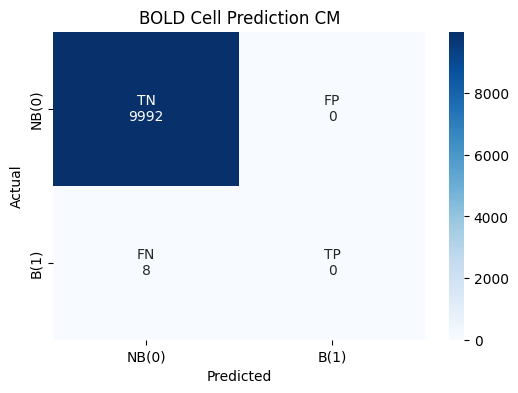


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---
No bold cells predicted.

--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0
0,1
6,1
16,1
23,1
28,1
39,1
45,1
63,1



Filename: ../data/1k_val/1-s2.0-S0041008X19303655-mmc4.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
No bold cells in the actual data.

NB to B ratio: Predicted = 10000:0 | Actual = 10000:0
Accuracy: 100.00% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



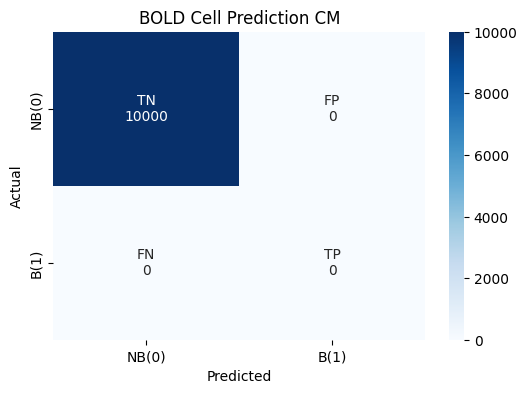


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---
No bold cells predicted.

--- Actual Grid (1 = Bold, 0 = Not Bold) ---
No bold cells in actual data.

Filename: ../data/1k_test/1415-bassessment-1.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(8,5): 0.991579 | (8,6): 0.991888 | (8,3): 0.992706 | (6,0): 0.992763 | (8,2): 0.993314 | (8,1): 0.993366 | (8,4): 0.993478 | (8,0): 0.993606

NB to B ratio: Predicted = 10000:0 | Actual = 9992:8
Accuracy: 99.92% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



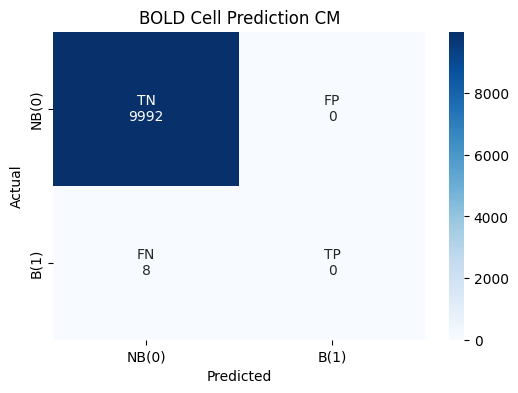


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---
No bold cells predicted.

--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
6,1,0,0,0,0,0,0
8,1,1,1,1,1,1,1


In [4]:
# Params
loc = 0
thresh = 0.995

# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)

Batch Inference: 100%|██████████| 267/267 [00:48<00:00,  5.52it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 8000000:0 | Actual = 7975154:24846
Accuracy: 99.69% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



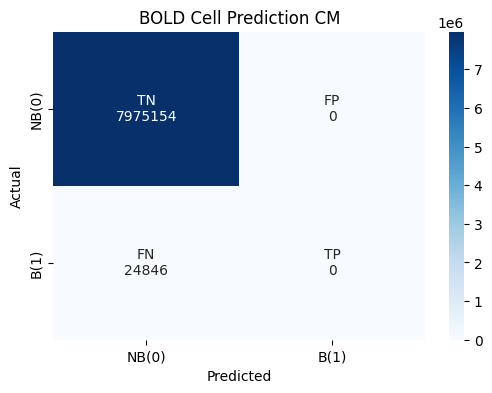

In [5]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)


Batch Inference: 100%|██████████| 34/34 [00:06<00:00,  5.64it/s]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 1000000:0 | Actual = 997147:2853
Accuracy: 99.71% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



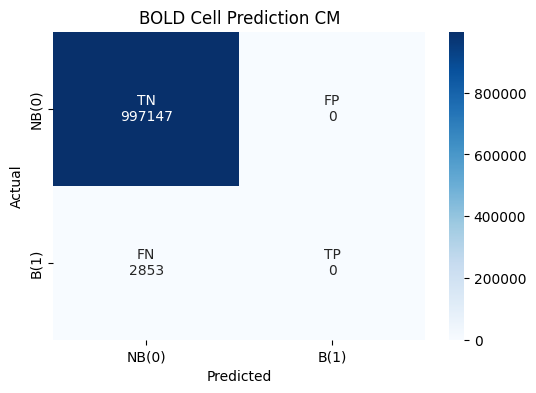

Batch Inference: 100%|██████████| 34/34 [00:06<00:00,  5.61it/s]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 1000000:0 | Actual = 997320:2680
Accuracy: 99.72% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



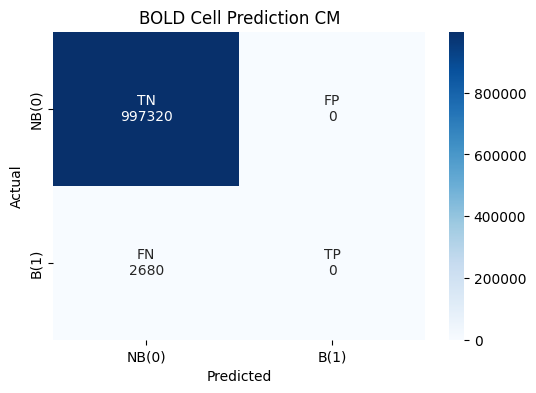

In [ ]:

thresh = 0.995
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)